120


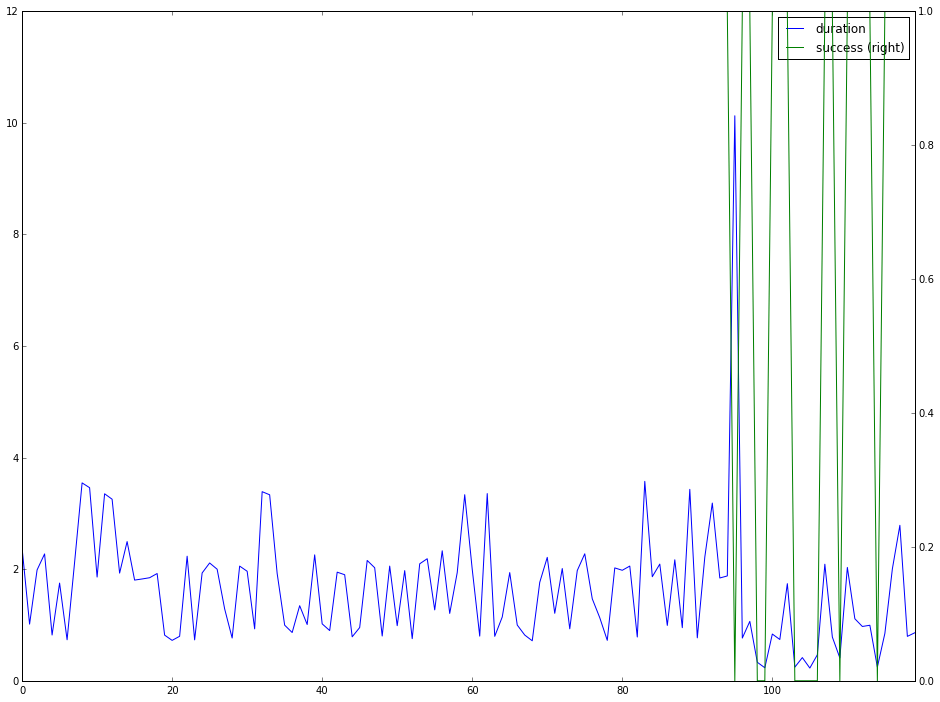

In [7]:
%matplotlib inline

db='webhealth'
username='root'
password=''
website='ogilvy.com'

import MySQLdb

db = MySQLdb.connect(host='localhost',
                     user=username,
                     passwd=password,
                     db=db)
c = db.cursor()

c.execute('select reason, duration, end_time from metrics where website=%s', (website,))

end_time_data = []
success_data = []
duration_data =[]
for i in range(c.rowcount):
    reason, duration, end_time = c.fetchone()
    success = int(reason) == 0
    #end_time_data.append(int(end_time))
    success_data.append(int(success))
    duration_data.append(float(duration))
c.close()
    
print len(success_data)
    
import pandas as pd

df = pd.DataFrame({
        'success': pd.Series(success_data),
        'duration': pd.Series(duration_data)
    })
df.plot(secondary_y='success', figsize=(16, 12))